# ch06. 차원축소

## 01.차원축소의 개요
- 차원이 증가할 수록 데이터간의 거리가 멀어지게 된다. -> 과적합의 위험
- 차원축소는 많은 feature로 구성된 다차원 데이터 셋의 차원을 축소하여(잠재적인 요소를 만든다) 새로운 차원의 데이터셋을 생성하는 것 
<br>
- **피처선택** : 특정피처에 종속성이 강한 불필요한 피처제거, 주요피처만 선택
- **피처추출** : 기존피처를 저차원의 중요피처로 압축하여 추출, 기존피처를 단순 압축이 아닌, 함축적으로 잘 설명할 수 있는 다른 공간으로 매핑하여 추출하는 것을 의미. 즉 잠재적인 요소를 추출하는 것을 의미한다. 

## 02. PCA
- https://excelsior-cjh.tistory.com/167?category=918734
- 주성분(ith 축을 정의하는 단위벡터)을 추출해 차원을 추출하는 방법
- 입력데이터의 공분산 행렬이 고유벡터와 고윳값으로 분해되며, 고유벡터를 이용해 입력데이터를 선형변환하는 방식
- 목표 : 원데이터를 최대한 보존하는 축(=데이터의 분산이 최대=원데이터셋과 투영된 데이터셋의 평균제곱거리 최소화) 을 찾아 투영하는 것.

In [1]:
#4개의 속성을 2개의 PCA차원으로 압축해 어떻게 달라지는지 확인
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length','petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


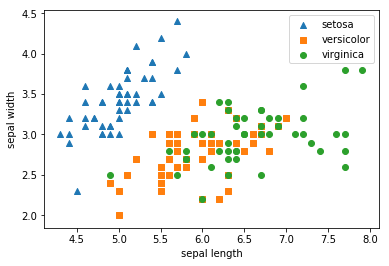

In [2]:
#각 품종에 따라 어떻게 분포돼있는지 2차원 시각화 
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
#특성 스케일링

from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [7]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
#함축된 두 feauture
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


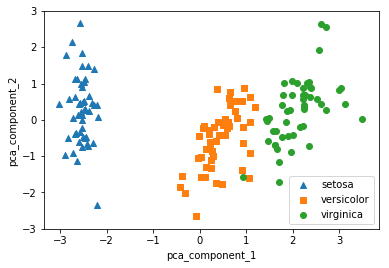

In [9]:
#시각화 
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [11]:
print(pca.explained_variance_ratio_) #전체 변동의 95%를 차지한다. 

[0.76740358 0.18282727]


원본 iris와 PCA로 변환된 데이터에 각각 분류(RandomForest)를 적용한 후 결과 비교

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(random_state=156)
#원본데이터에 rf
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)

[0.98 0.94 0.96]


In [18]:
#pca적용데이터에 rf
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
#대부분은 차원변환갯수에 따라 예측성능이 떨어질 수 밖에 없다.

[0.98 0.98 1.  ]


- 많은 feature을 가진 데이터의 경우 PCA변환후 모델 적용하는 경우

In [24]:
import pandas as pd

df = pd.read_excel('credit_card.xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [25]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [26]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


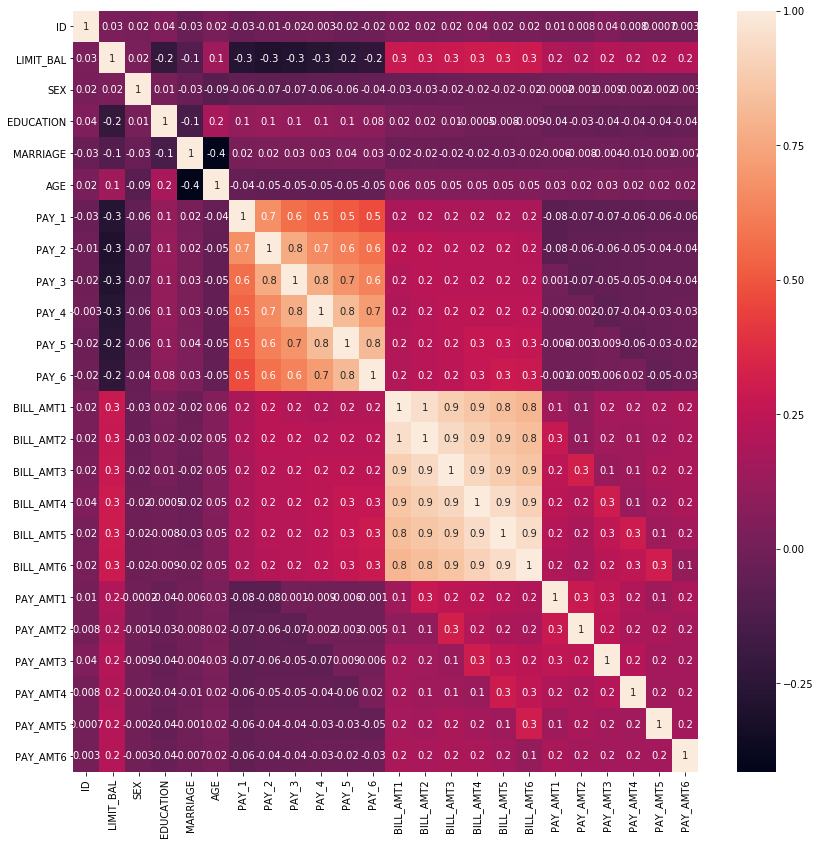

In [28]:
#각 feaure끼리의 상관도 시각화 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [32]:
#상관도가 높은 변수들을 PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#상관도가 높은 BILL_AMT1 ~ BILL_AMT6의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print("대상속성명:", cols_bill)

#2개의 PCA속성을 가진 PCA를 생성하고, 변동성 확인
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Compoent별 변동성:', pca.explained_variance_ratio_)
#pca만으로 95%이상의 변동성을 수용할 만큼 상관성이 높은 변수였음 

대상속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Compoent별 변동성: [0.90555253 0.0509867 ]


In [33]:
#원본데이터, pca데이터를 rf에 적용했을 때의 정확도 비교

#원본데이터
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.257  0.8209 0.784 ]
평균 정확도:0.6206


In [34]:
#pca적용한 경우
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7717 0.7995 0.8055]
PCA 변환 데이터 셋 평균 정확도:0.7922


## 2. LDA
- **선형판별분석법**으로, 지도학습의 분류에서 사용하기 쉽도록 개별 클래스 기준을 유지하면서 차원을 축소
- 클래스간 분산은 최대, 클래스 내부 분산은 최소

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [37]:
#LDA적용
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


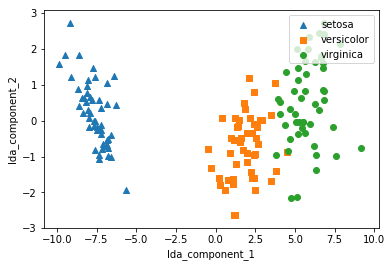

In [38]:
#component1, 2에 대해 시각화 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 4. SVD
- SVD의 개요
- 특이값 분해 참고 : https://darkpgmr.tistory.com/106
- 고윳값분해와 비슷하되, A가 정방행렬이 아니어도 된다. 
- sigma의 비대각인 부분과 대각원소 중 특이값이 0인 부분을 제거하고 제거된 sigma에 대응되는 U, V의 원소도 함께 제거해 차원축소하는 방법

In [39]:
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [40]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [41]:
#sigma를 다시 0을 포함한 대칭행렬로 변환하여, 원본과 같이 복원되는지를 확인
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


데이터가 로우 간 의존성이 있는 경우 sigma값이 어떻게 변하고 차원축소가 어떻게 되는지 확인

In [43]:
#의존성을 가지는 로우를 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [44]:
#다시 SVD를 수행하야 sigma확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [45]:
#복원
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD**<br>
특이값 중 상위 일부 값만 추출해 분해하는 방식

In [46]:
#특이값분해 적용
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


In [48]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4 #특이값의 수를 지정
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)


Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


sklearn의 truncatedSVD의 사용

In [49]:
#truncatedSVD
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component 2')

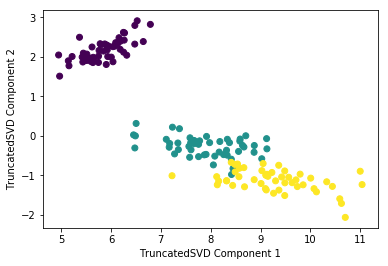

In [51]:
#truncatedSVD시각화
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

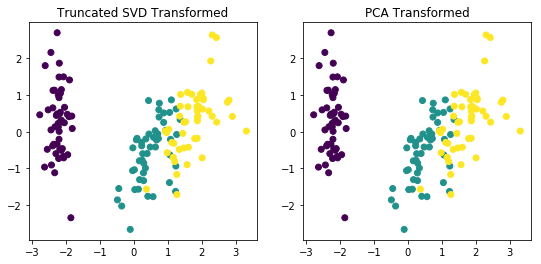

In [52]:
#pca도 결국 svd알고리즘 기반으로 하므로
#feature scaling이후엔 거의 비슷한 결과를 가진다. 
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [53]:
#컴포넌트 비율값의 차이 확인
print((iris_pca-iris_tsvd).mean())

2.3460053344415146e-15


## 5. NMF
- 낮은 랭크를 통한 행렬근사로 차원축소
- 분해행렬 W는 원본 행에 대해 잠재 요소의 값이 얼마나 되는지를 나타내고 분해행렬 H는 이 잠재요소가 원본열로 어떻게 구성이됐는지를 나타내는 행렬

In [54]:
#NMF 적용

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

Text(0, 0.5, 'NMF Component 2')

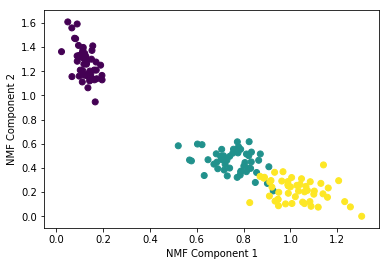

In [55]:
#시각화
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')